In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [3]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [4]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [5]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
match_df = matches.drop(['umpire1','umpire2','date',],axis=1)

In [7]:
match_df .columns.duplicated('match_id').sum()

np.int64(0)

In [8]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [9]:
match_df['team1'].unique().size

19

In [10]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [11]:
match_df['team1'].unique().size

19

In [12]:
match_df['team1'] = match_df['team1'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

match_df['team1'] = match_df['team1'].replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].replace('Kings XI Punjab','Punjab Kings')

match_df['team1'] = match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
match_df['team2'] = match_df['team2'].replace('Rising Pune Supergiants','Rising Pune Supergiant')

match_df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN


In [13]:
match_df['toss_winner'] = match_df['toss_winner'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
match_df['toss_winner'] = match_df['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')
match_df['toss_winner'] = match_df['toss_winner'].replace('Kings XI Punjab','Punjab Kings')
match_df['toss_winner'] = match_df['toss_winner'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

match_df['winner'] = match_df['winner'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
match_df['winner'] = match_df['winner'].replace('Kings XI Punjab','Punjab Kings')
match_df['winner'] = match_df['winner'].replace('Delhi Daredevils','Delhi Capitals')
match_df['winner'] = match_df['winner'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')


In [14]:
match_df['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [15]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

deliveries['batting_team'] = deliveries['batting_team'].replace('Kings XI Punjab','Punjab Kings')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Kings XI Punjab','Punjab Kings')

deliveries['batting_team'] = deliveries['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')

deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiants','Rising Pune Supergiant')

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [16]:
deliveries['batting_team'].unique().size

15

<h1><b>Team Performance:

<h3><b>Problems :

1. Plot Matches Played and Winning Percentages
2. Plot Run Rate and Economy Rate(as a bowling side)
3. Plot Highest and Lowest Scores
4. Plot Total 4s and 6s
5. Plot Average Powerplay and Death Overs Score
6. Powerplay Analysis

<h4><b>1.Plot Matches Played and Winning Percentages

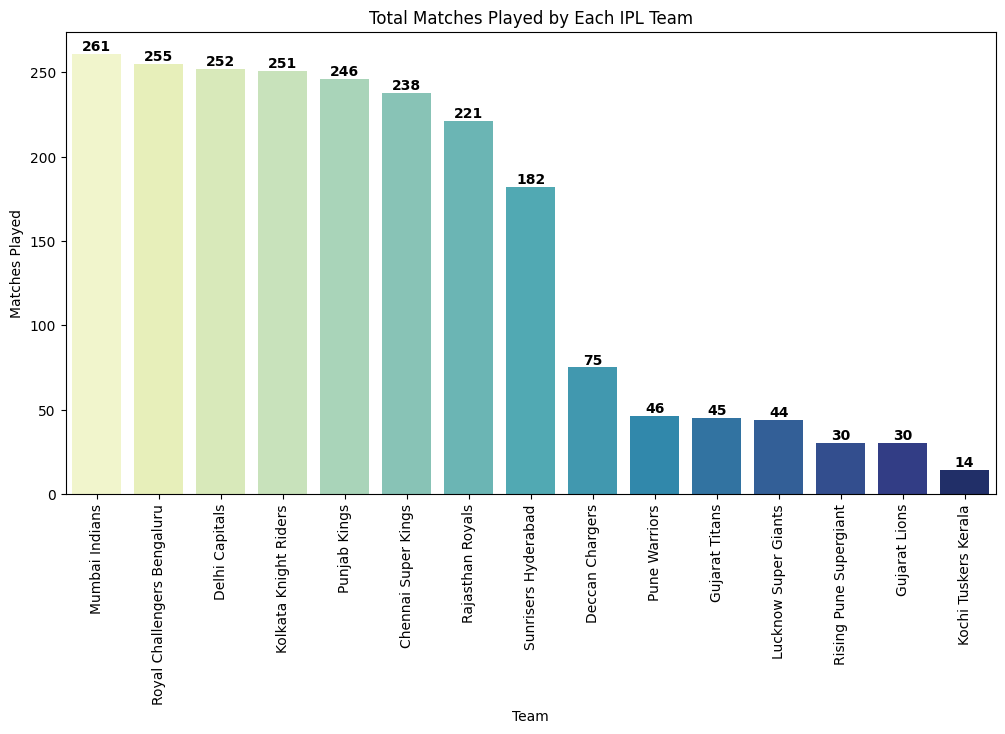

In [17]:
#1 Matches Played 

matches_played = pd.concat([match_df['team1'], match_df['team2']]).value_counts().reset_index()
matches_played.columns = ['Team', 'Matches Played']

plt.figure(figsize=(12, 6))
sns.barplot(x="Team", y="Matches Played", data=matches_played,hue='Team', palette="YlGnBu")

for index, row in matches_played.iterrows():
    plt.text(index, row["Matches Played"] + 2, f"{row['Matches Played']}", ha='center', fontsize=10, fontweight='bold')

plt.title("Total Matches Played by Each IPL Team")
plt.xticks(rotation=90)
plt.show()

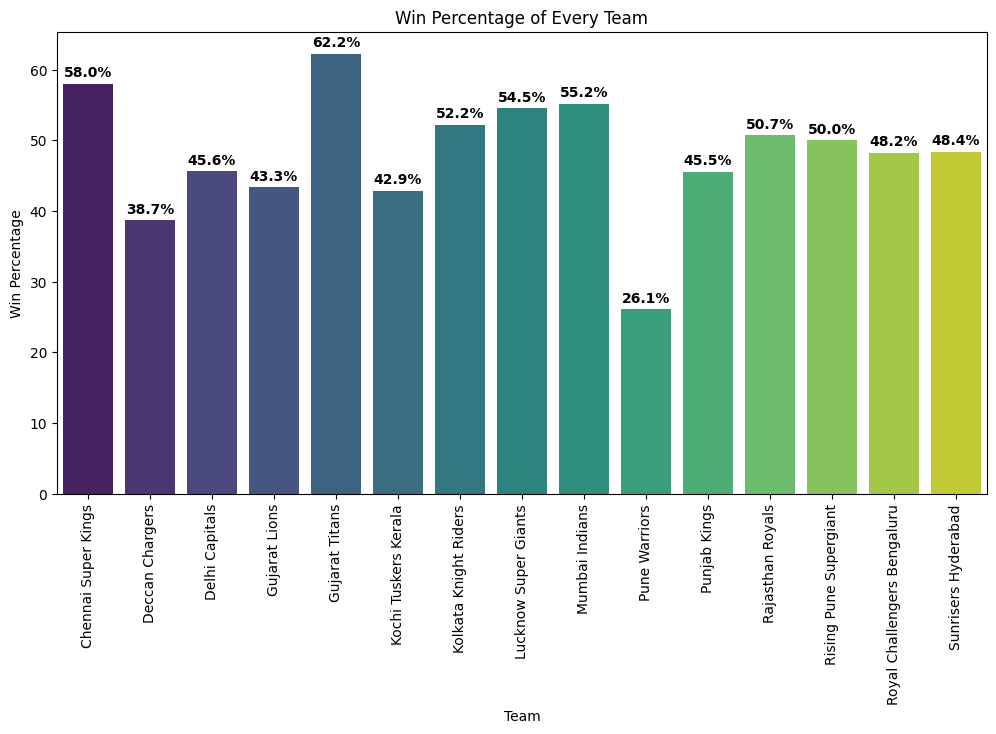

In [18]:
# Winning Percentages

matches_played = pd.concat([match_df['team1'], match_df['team2']]).value_counts()
wins = match_df['winner'].value_counts()

win_percentage = (wins / matches_played) * 100
win_percentage = win_percentage.fillna(0).reset_index()
win_percentage.columns = ['Team', 'Win Percentage']

plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Win Percentage', data=win_percentage,hue='Team', palette='viridis')
plt.xticks(rotation=90)

for i, row in enumerate(win_percentage.itertuples()):
    plt.text(i, row._2 + 1, f"{row._2:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.title('Win Percentage of Every Team')
plt.show()

<h4><b>2. Plot Run Rate and Economy Rate.

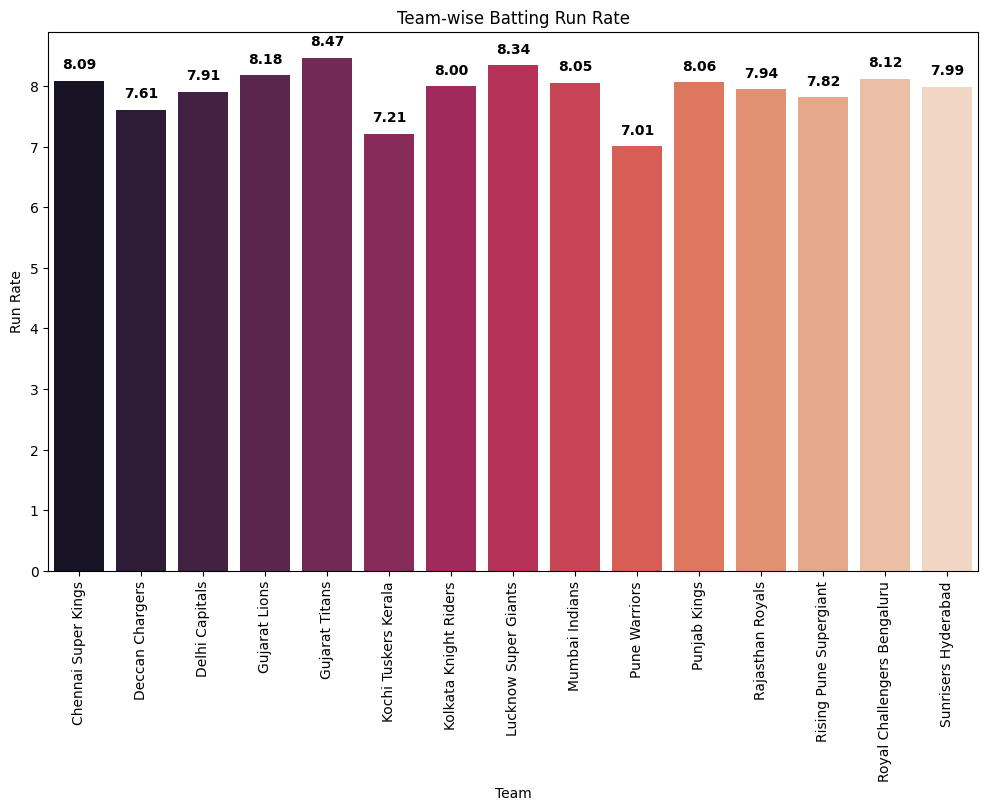

In [19]:
#Run Rate
team_runs = deliveries.groupby('batting_team')['total_runs'].sum()
team_balls = deliveries.groupby('batting_team').count()['ball']
run_rate = (team_runs / (team_balls / 6)).reset_index()
run_rate.columns = ['Team', 'Run Rate']

plt.figure(figsize=(12,7))
sns.barplot(x='Team', y='Run Rate', data=run_rate,hue='Team', palette='rocket', legend=False)

for index, row in run_rate.iterrows():
    plt.text(index, row["Run Rate"] + 0.2, f"{row['Run Rate']:.2f}", ha='center', fontsize=10, fontweight='bold')
    
plt.xticks(rotation=90)
plt.title('Team-wise Batting Run Rate')
plt.show()

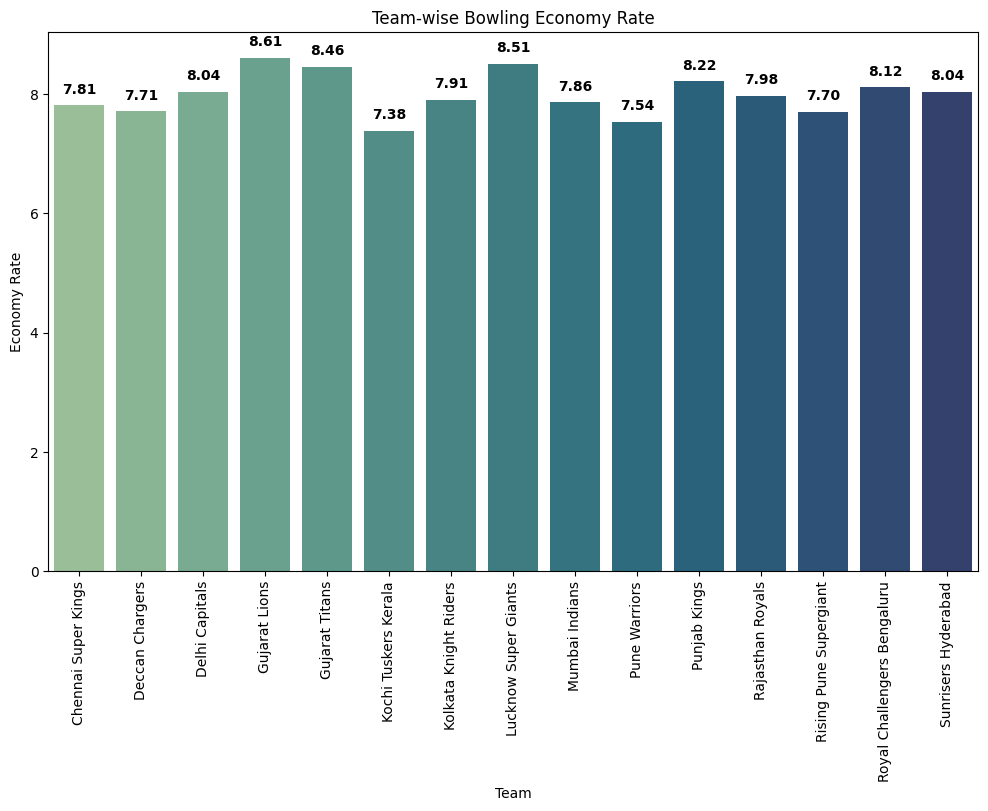

In [20]:
# Economy Rate

bowling_runs = deliveries.groupby('bowling_team')['total_runs'].sum()
bowling_balls = deliveries.groupby('bowling_team').count()['ball']
economy_rate = (bowling_runs / (bowling_balls / 6)).reset_index()
economy_rate.columns = ['Team', 'Economy Rate']

plt.figure(figsize=(12,7))
sns.barplot(x='Team', y='Economy Rate', data=economy_rate,hue='Team', palette='crest', legend=False)

for index, row in economy_rate.iterrows():
    plt.text(index, row["Economy Rate"] + 0.2, f"{row['Economy Rate']:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=90)
plt.title('Team-wise Bowling Economy Rate')
plt.show()

<h4><b>3. Plot Highest and Lowest Scores

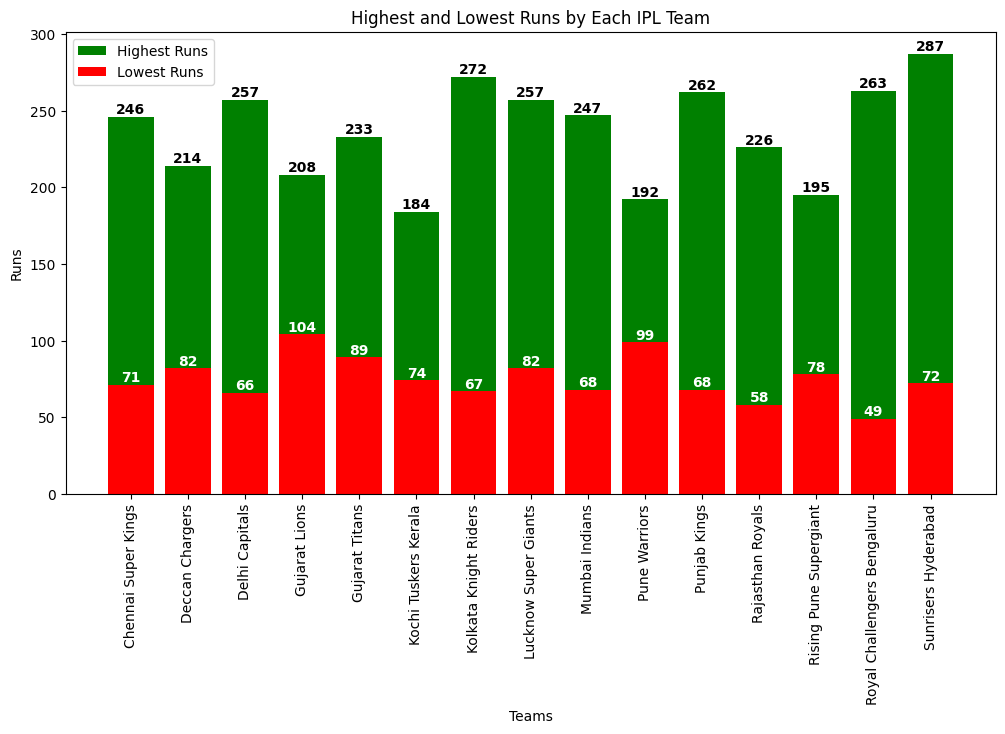

In [21]:
matches_filtered = match_df[(match_df['winner'].notna()) & (~matches['method'].str.contains("D/L", na=False))]
deliveries_filtered = deliveries[deliveries['match_id'].isin(matches_filtered['id'])]

team_runs = deliveries_filtered.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

balls_faced = deliveries_filtered.groupby(["match_id", "batting_team"])["ball"].count().reset_index()
balls_faced.columns = ["match_id", "batting_team", "balls_faced"]

team_runs = team_runs.merge(balls_faced, on=["match_id", "batting_team"])
valid_lowest_scores = team_runs[(team_runs["balls_faced"] == 120) | (team_runs["total_runs"] < 100)]

highest_scores = team_runs.groupby("batting_team")["total_runs"].max().reset_index()
lowest_scores = valid_lowest_scores.groupby("batting_team")["total_runs"].min().reset_index()


team_stats = highest_scores.merge(lowest_scores, on="batting_team", suffixes=("_max", "_min"))

plt.figure(figsize=(12, 6))
bars_high = plt.bar(team_stats["batting_team"], team_stats["total_runs_max"], label="Highest Runs", color="green")
bars_low = plt.bar(team_stats["batting_team"], team_stats["total_runs_min"], label="Lowest Runs", color="red")

for bar in bars_high:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars_low:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.xlabel("Teams")
plt.ylabel("Runs")
plt.title("Highest and Lowest Runs by Each IPL Team")
plt.xticks(rotation=90)
plt.legend()
plt.show()

<h4><b>4. Plot Total 4s and 6s

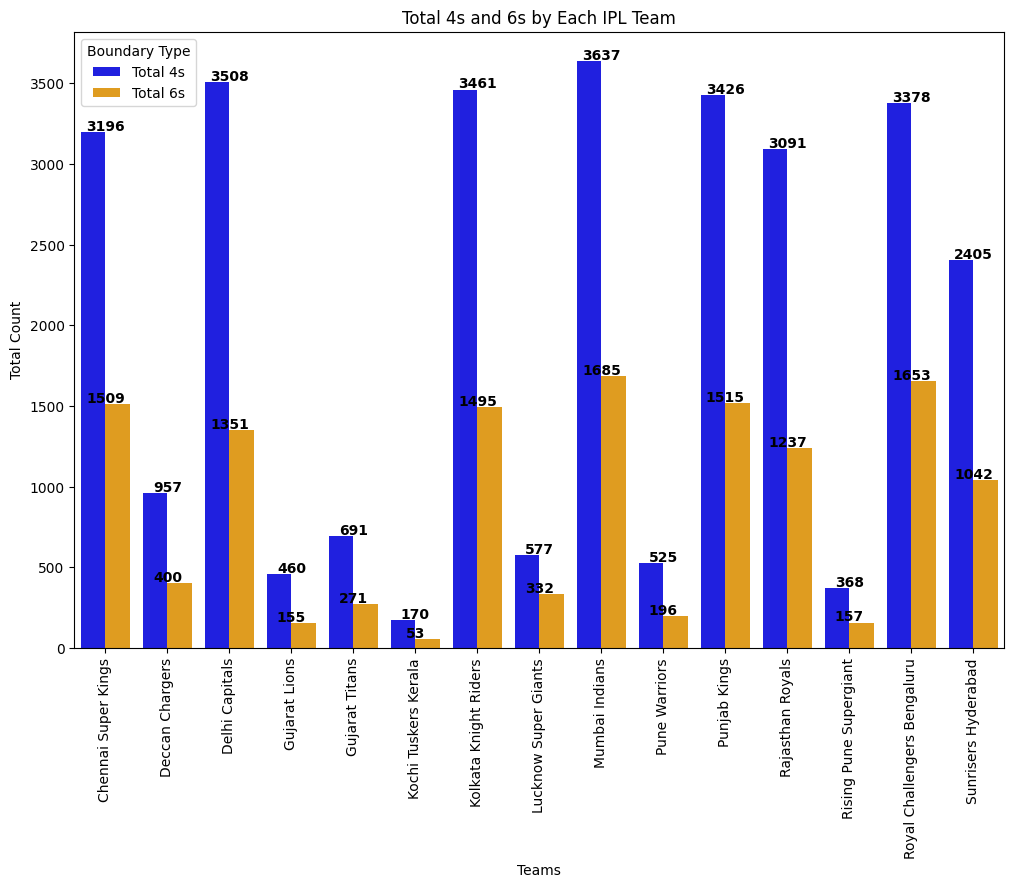

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boundaries = deliveries[deliveries["batsman_runs"].isin([4, 6])].copy()

team_boundaries = boundaries.groupby(["batting_team", "batsman_runs"])["batsman_runs"].count().unstack(fill_value=0)
team_boundaries.columns = ["Total 4s", "Total 6s"]
team_boundaries.reset_index(inplace=True)


plt.figure(figsize=(12, 8))
team_boundaries_melted = team_boundaries.melt(id_vars="batting_team", var_name="Boundary Type", value_name="Count")

sns.barplot(x="batting_team", y="Count", hue="Boundary Type", data=team_boundaries_melted, palette = ['Blue',"Orange"])

for index, row in team_boundaries_melted.iterrows():
    plt.text(index % len(team_boundaries), row["Count"] + 10, f"{row['Count']}", 
             ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Teams")
plt.ylabel("Total Count")
plt.title("Total 4s and 6s by Each IPL Team")
plt.xticks(rotation=90)
plt.legend(title="Boundary Type")

plt.show()

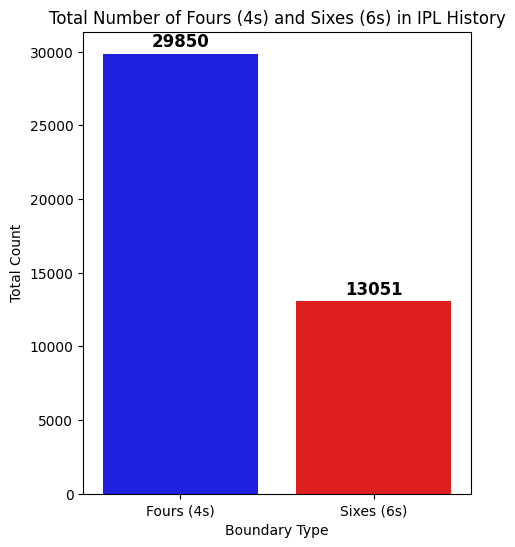

In [23]:
boundaries = deliveries[deliveries["batsman_runs"].isin([4, 6])]

boundary_counts = boundaries["batsman_runs"].value_counts().reset_index()
boundary_counts.columns = ["Boundary Type", "Total Count"]

boundary_counts["Boundary Type"] = boundary_counts["Boundary Type"].replace({4: "Fours (4s)", 6: "Sixes (6s)"})
plt.figure(figsize=(5, 6))
sns.barplot(x="Boundary Type", y="Total Count", data=boundary_counts,hue="Boundary Type",palette=["blue", "red"])

for index, row in boundary_counts.iterrows():
    plt.text(index, row["Total Count"] + 500, f"{row['Total Count']}", 
             ha='center', fontsize=12, fontweight='bold')

plt.title("Total Number of Fours (4s) and Sixes (6s) in IPL History")
plt.show()

<h4><b>5. Plot Average Powerplay and Death Overs Score

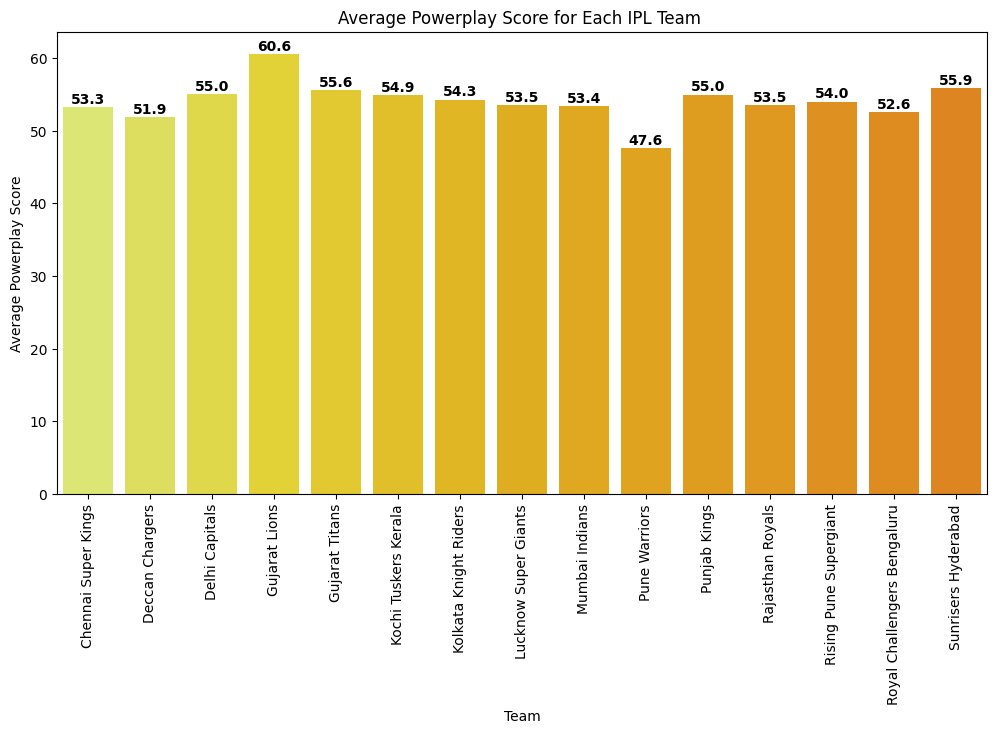

In [24]:
# Plot Average Powerplay Score

powerplay_deliveries = deliveries[deliveries["over"] <= 6]
powerplay_scores = powerplay_deliveries.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

average_powerplay_scores = powerplay_scores.groupby("batting_team")["total_runs"].mean().reset_index()
average_powerplay_scores.columns = ["Team", "Average Powerplay Score"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Team", y="Average Powerplay Score", data=average_powerplay_scores,hue="Team", palette="Wistia")

for index, row in average_powerplay_scores.iterrows():
    plt.text(index, row["Average Powerplay Score"] + 0.5, f"{row['Average Powerplay Score']:.1f}",ha='center', fontsize=10, fontweight='bold')

plt.title("Average Powerplay Score for Each IPL Team ")
plt.xticks(rotation=90)

plt.show()

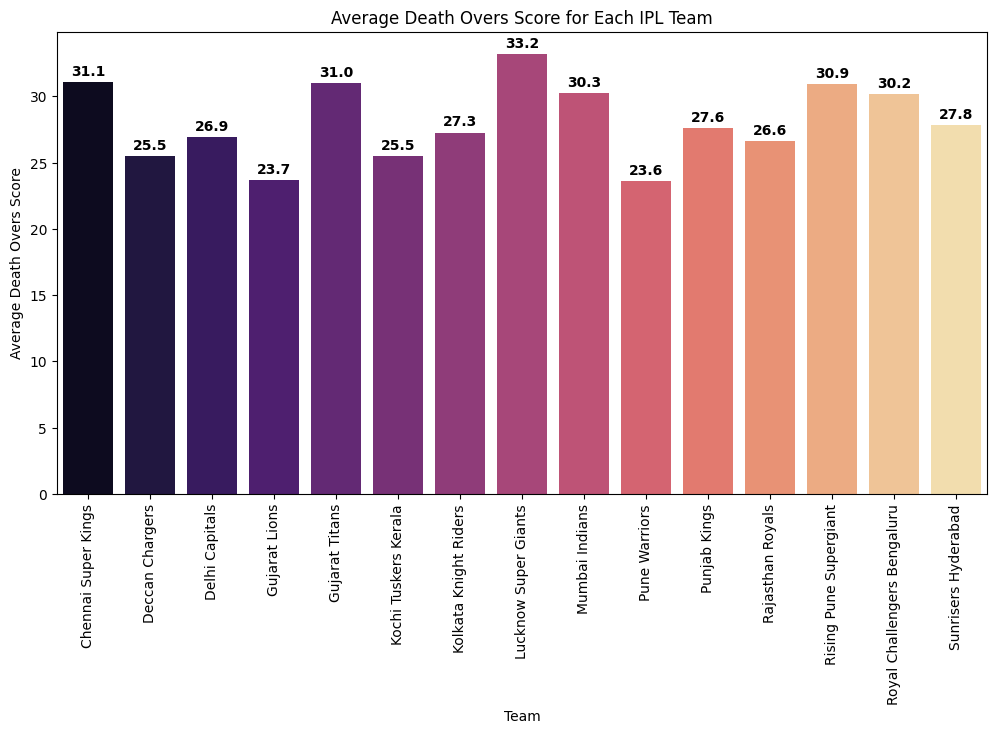

In [25]:
# Plot Average Death Overs Score

death_over_deliveries = deliveries[(deliveries["over"] >= 17) & (deliveries["over"] <= 20)]
death_over_scores = death_over_deliveries.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()


average_death_over_scores = death_over_scores.groupby("batting_team")["total_runs"].mean().reset_index()
average_death_over_scores.columns = ["Team", "Average Death Overs Score"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Team", y="Average Death Overs Score", data=average_death_over_scores,hue="Team", palette="magma")

for index, row in average_death_over_scores.iterrows():
    plt.text(index, row["Average Death Overs Score"] + 0.5, f"{row['Average Death Overs Score']:.1f}", ha='center', fontsize=10, fontweight='bold')

plt.title("Average Death Overs Score for Each IPL Team")
plt.xticks(rotation=90)
plt.show()

<h4><b>6. Powerplay Analysis

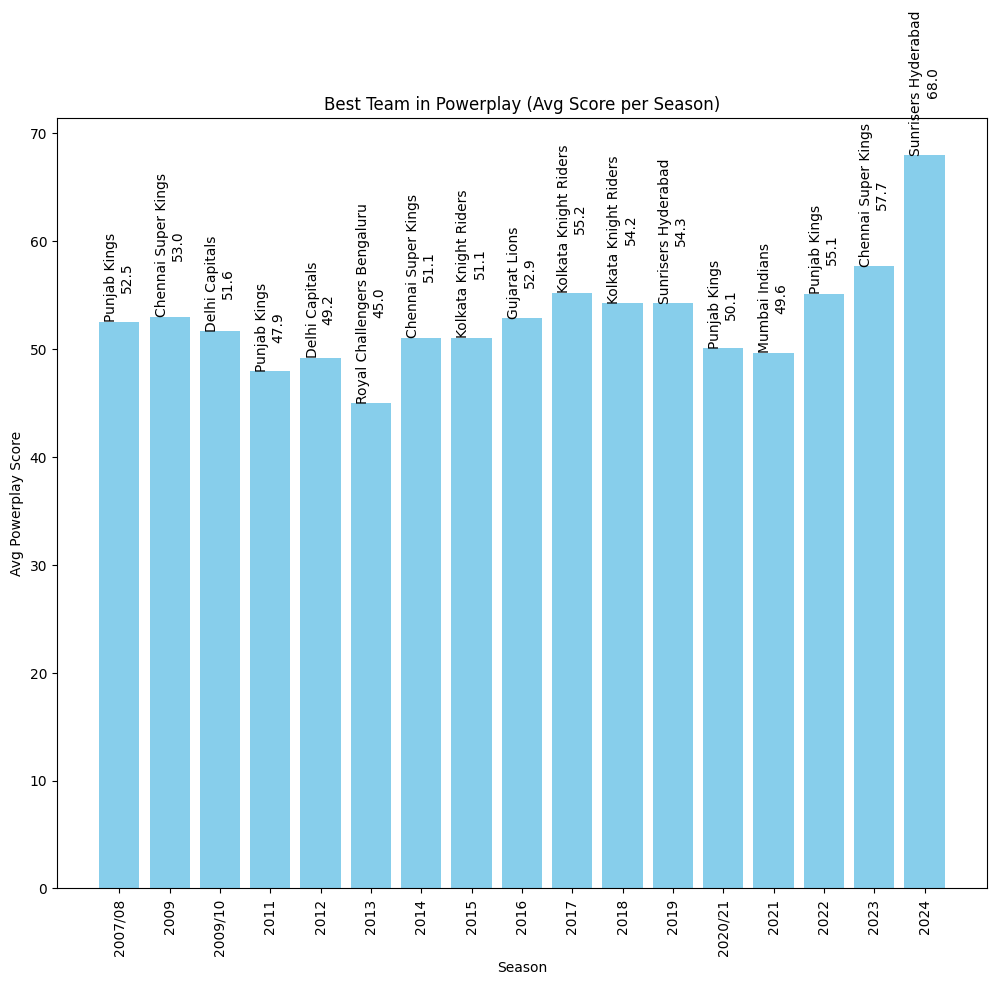

In [53]:
df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

powerplay_df = df[df['over'].between(1, 6)]
powerplay_scores = powerplay_df.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()

match_counts = df.groupby(['season', 'batting_team'])['match_id'].nunique().reset_index()
match_counts.rename(columns={'match_id': 'matches'}, inplace=True)
powerplay_scores = powerplay_scores.merge(match_counts, on=['season', 'batting_team'])
powerplay_scores['avg_powerplay_score'] = powerplay_scores['total_runs'] / powerplay_scores['matches']

best_teams_per_season = powerplay_scores.loc[powerplay_scores.groupby('season')['avg_powerplay_score'].idxmax()]

plt.figure(figsize=(12, 10))
plt.bar(best_teams_per_season['season'].astype(str), best_teams_per_season['avg_powerplay_score'], color='skyblue')
for i, row in best_teams_per_season.iterrows():
    plt.text(row['season'], row['avg_powerplay_score'], f"{row['batting_team']}\n{row['avg_powerplay_score']:.1f}", 
             ha='center', va='bottom', fontsize=10, color='black',rotation= 90,)

plt.xlabel("Season")
plt.ylabel("Avg Powerplay Score")
plt.title("Best Team in Powerplay (Avg Score per Season)")
plt.xticks(rotation=90)
plt.show()

<h1><b>Player Performance:

<h3><b>Problems :

1. Get the top 20 run-scorers
2. Plot Batting Average vs Batting Strike Rate for the top 20 run-scorers
3. Find Highest Average and Strike Rate for players with >50 matches
4. Plot top wicket-takers
5. Plot top highest individual scores
6. Man of the Match Count Analysis
7. Use K-Means Clustering to plot Batting Average vs Bowling Economy Rate for number of clusters = 3 (Batsman, Bowler, All Rounder)
8. Identify Top 10 Batsmen in each run category:<br>
   a. Top 6’s scorer<br>
   b. Top 4’s scorer<br>
   c. Top 2’s scorer<br>
   d. Top 1’s scorer

<h4><b>1. Get the top 20 run-scorers

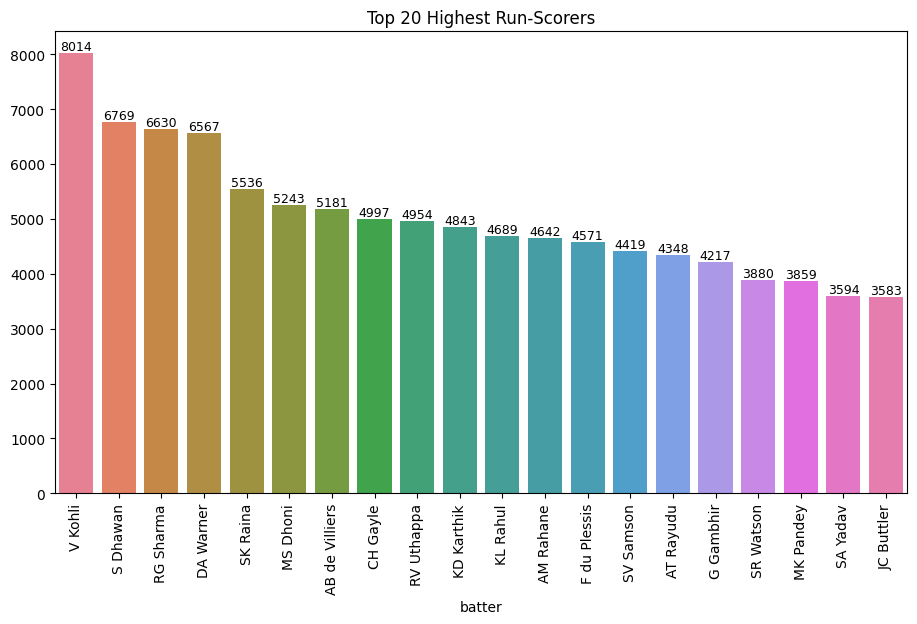

In [28]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(11,6))
ax = sns.barplot(x=top_batsmen.index, y=top_batsmen.values,hue=top_batsmen.index,palette ='husl')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=90)
plt.title('Top 20 Highest Run-Scorers')
plt.show()

<h4><b>2. Plot Batting Average vs Batting Strike Rate for the top 20 run-scorers

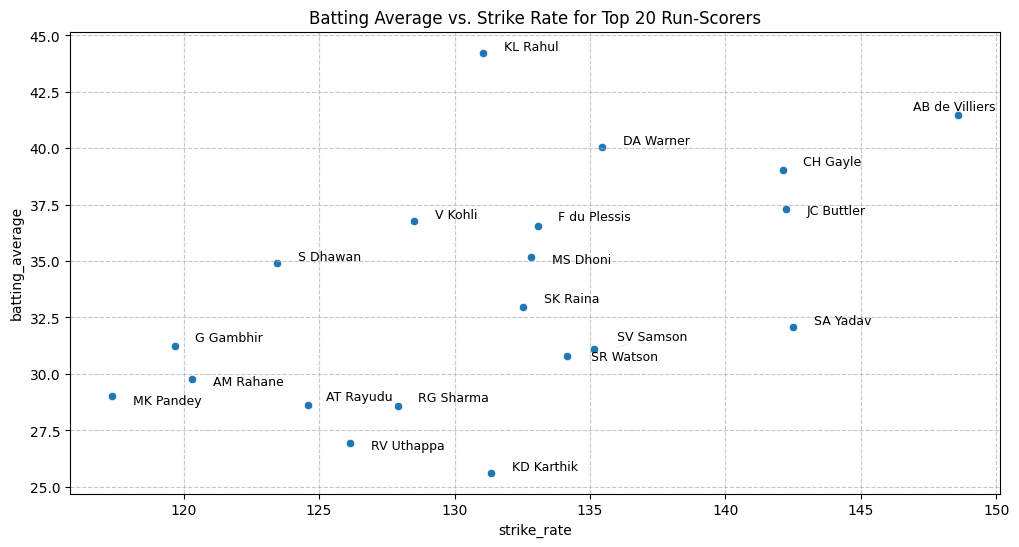

In [29]:
from adjustText import adjust_text

batsman_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', 'count'),
    matches_played=('match_id', 'nunique')).reset_index()

batsman_stats['batting_average'] = batsman_stats['total_runs'] / batsman_stats['dismissals']
batsman_stats['batting_average'] = batsman_stats['batting_average'].fillna(0)
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

top_20_batsmen = batsman_stats.sort_values(by='total_runs', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.scatterplot(data = top_20_batsmen,x = 'strike_rate', y = 'batting_average')

texts = []
for i, row in top_20_batsmen.iterrows():
    texts.append(plt.text(row['strike_rate'] + 0.7, row['batting_average'], row['batter'], fontsize=9, ha='left'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.1))

plt.title("Batting Average vs. Strike Rate for Top 20 Run-Scorers")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h4><b>3. Find Highest Average and Strike Rate for players with >50 matches

In [30]:
filtered_batsmen = batsman_stats[batsman_stats['matches_played'] > 50]

highest_avg_player = filtered_batsmen.loc[filtered_batsmen['batting_average'].idxmax(), ['batter', 'batting_average']]
highest_sr_player = filtered_batsmen.loc[filtered_batsmen['strike_rate'].idxmax(), ['batter', 'strike_rate']]

print(f"Highest Batting Average (Min 50 Matches): {highest_avg_player['batter']} - {highest_avg_player['batting_average']:.2f}")
print(f"Highest Strike Rate (Min 50 Matches): {highest_sr_player['batter']} - {highest_sr_player['strike_rate']:.2f}")

Highest Batting Average (Min 50 Matches): KL Rahul - 44.24
Highest Strike Rate (Min 50 Matches): AD Russell - 164.22


<h4><b>4. Plot top wicket-takers

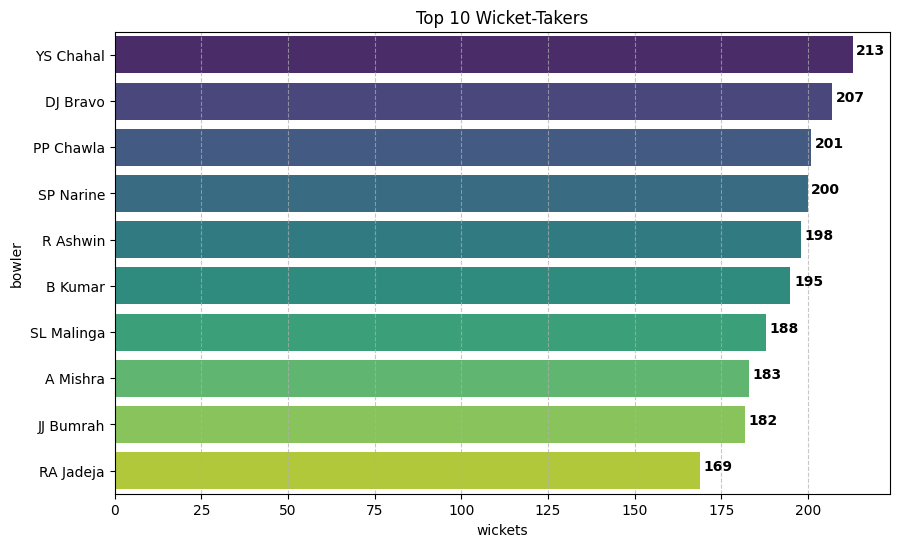

In [31]:
wicket_takers = deliveries[deliveries['player_dismissed'].notna()] 
bowler_stats = wicket_takers.groupby('bowler').size().reset_index(name='wickets')

top_10_bowlers = bowler_stats.sort_values(by='wickets', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='wickets', y='bowler', data=top_10_bowlers,hue='bowler', palette='viridis')

for i, row in enumerate(top_10_bowlers.itertuples()):
    plt.text(row.wickets + 1, i, str(row.wickets), ha='left', fontsize=10, fontweight='bold')

plt.title("Top 10 Wicket-Takers")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<h4><b>5. Plot top highest individual scores

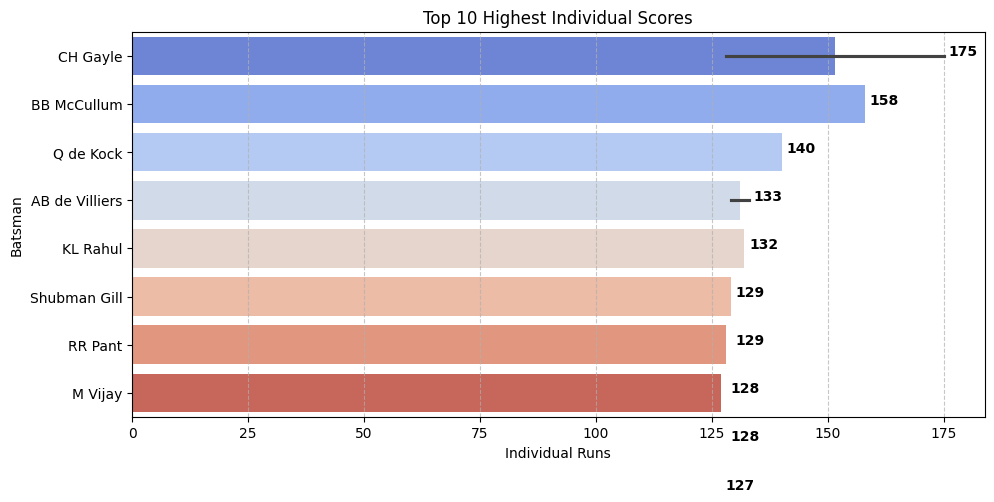

In [32]:
individual_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
top_10_scores = individual_scores.sort_values(by='batsman_runs', ascending=False).head(10)

plt.figure(figsize=(11, 5))
sns.barplot(x='batsman_runs', y='batter', data=top_10_scores,hue='batter', palette='coolwarm')

for i, row in enumerate(top_10_scores.itertuples()):
    plt.text(row.batsman_runs + 1, i, str(row.batsman_runs), ha='left', fontsize=10, fontweight='bold')

plt.title("Top 10 Highest Individual Scores")
plt.xlabel("Individual Runs")
plt.ylabel("Batsman")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<h4><b>6. Man of the Match Count Analysis

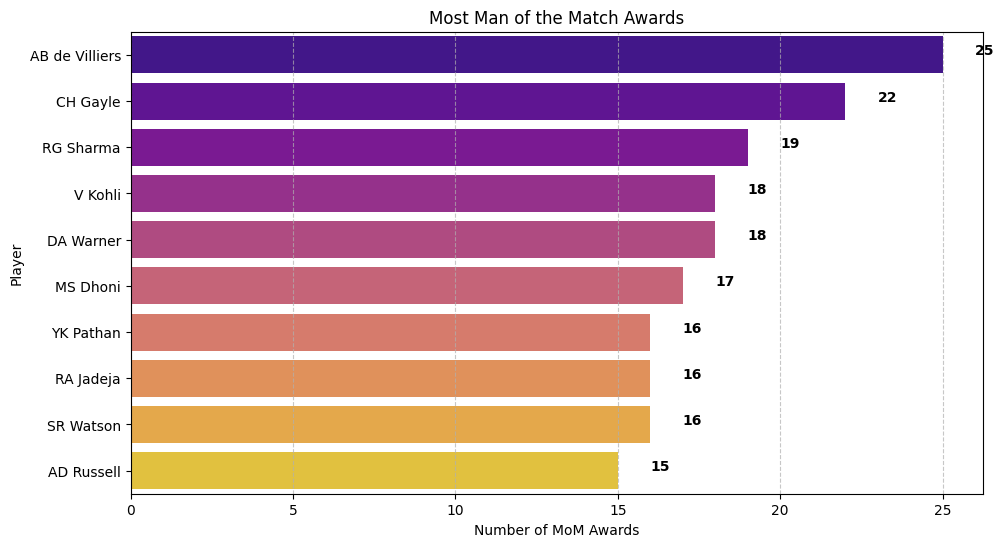

In [33]:
mom_counts = matches['player_of_match'].value_counts().reset_index()
mom_counts.columns = ['Player', 'MOM Awards']

top_10_mom = mom_counts.head(10)
plt.figure(figsize=(11, 6))
sns.barplot(x='MOM Awards', y='Player', data=top_10_mom,hue='Player', palette='plasma')

for i, row in enumerate(top_10_mom.itertuples()):
    plt.text(row._2 + 1, i, str(row._2), ha='left', fontsize=10, fontweight='bold')

plt.title("Most Man of the Match Awards")
plt.xlabel("Number of MoM Awards")
plt.ylabel("Player")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<h4><b>7. Use K-Means Clustering to plot Batting Average vs Bowling Economy Rate for number of clusters = 3 (Batsman, Bowler,All Rounder)

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

batsman_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    dismissals=('player_dismissed', 'count')
).reset_index()

batsman_stats['batting_average'] = batsman_stats['total_runs'] / batsman_stats['dismissals']
batsman_stats['batting_average'] = batsman_stats['batting_average'].replace([np.inf, np.nan], 0)

bowler_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
).reset_index()

bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs_bowled']
bowler_stats = bowler_stats[bowler_stats['overs_bowled'] > 0]

player_stats = pd.merge(batsman_stats, bowler_stats, left_on='batter', right_on='bowler', how='inner')[['batter', 'batting_average', 'economy_rate']]

In [35]:
X = player_stats[['batting_average', 'economy_rate']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize Data

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
player_stats['cluster'] = kmeans.fit_predict(X_scaled)

cluster_means = player_stats.groupby('cluster')['batting_average'].mean().sort_values()

cluster_mapping = {
    cluster_means.index[0]: "Bowler",
    cluster_means.index[1]: "All Rounder",
    cluster_means.index[2]: "Batsman"
}

player_stats['player_type'] = player_stats['cluster'].map(cluster_mapping)

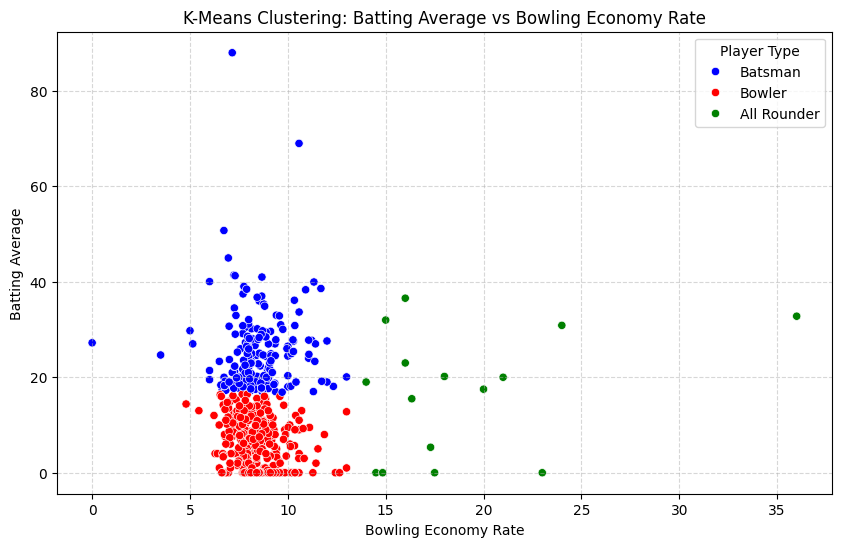

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_stats, x='economy_rate', y='batting_average', hue='player_type', palette={'Batsman': 'blue', 'Bowler': 'red', 'All Rounder': 'green'})

plt.title("K-Means Clustering: Batting Average vs Bowling Economy Rate")
plt.xlabel("Bowling Economy Rate")
plt.ylabel("Batting Average")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Player Type")
plt.show()

<h4><b>8. Identify Top 10 Batsmen in each run category:

In [37]:
batsman_shots = deliveries.groupby('batter').agg(
    six=('batsman_runs', lambda x: (x == 6).sum()),  
    four=('batsman_runs', lambda x: (x == 4).sum()), 
    two=('batsman_runs', lambda x: (x == 2).sum()), 
    one=('batsman_runs', lambda x: (x == 1).sum())  
).reset_index()

def plot_top_10(category, color):
    top_10 = batsman_shots.nlargest(10, category)
    plt.figure(figsize=(10, 5))
    bars = plt.barh(top_10['batter'], top_10[category], color=color)
    
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                 str(int(bar.get_width())), ha='left', va='center', fontsize=10, fontweight='bold')

    plt.xlabel(f"Total {category.capitalize()}s")
    plt.ylabel("Batter")
    plt.title(f"Top 10 Batsmen in {category.capitalize()}s Scored")
    plt.gca().invert_yaxis() 
    plt.show()

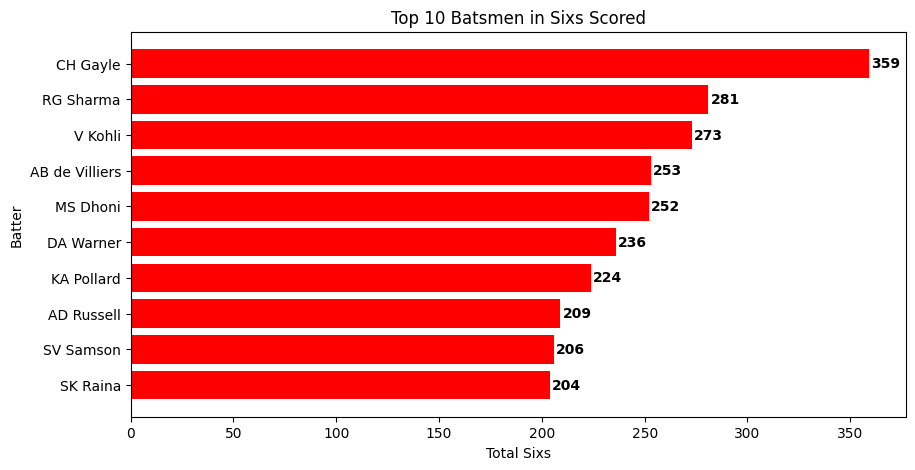

In [38]:
# Top 6’s scorer
plot_top_10('six', 'red')

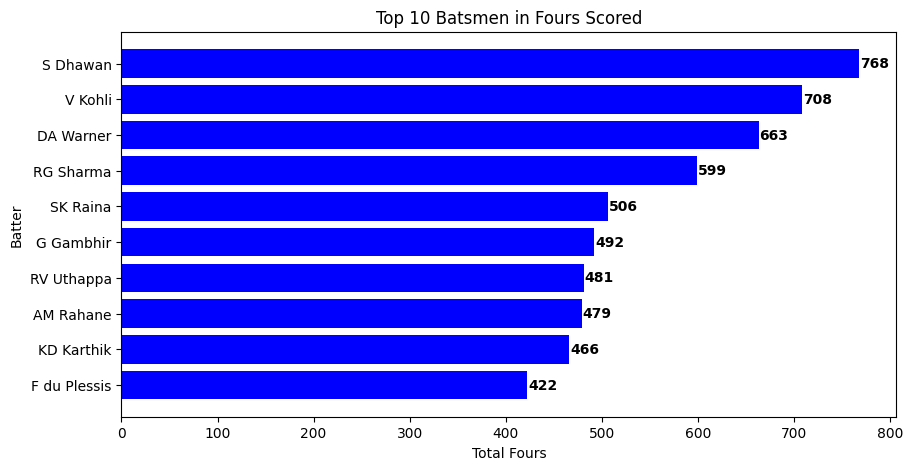

In [39]:
# Top 4’s scorer
plot_top_10('four', 'blue')

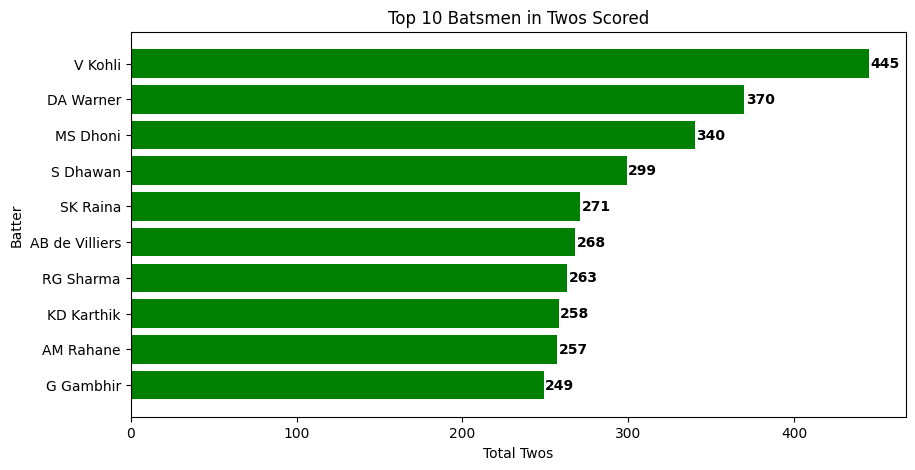

In [40]:
# Top 2’s scorer
plot_top_10('two', 'green')

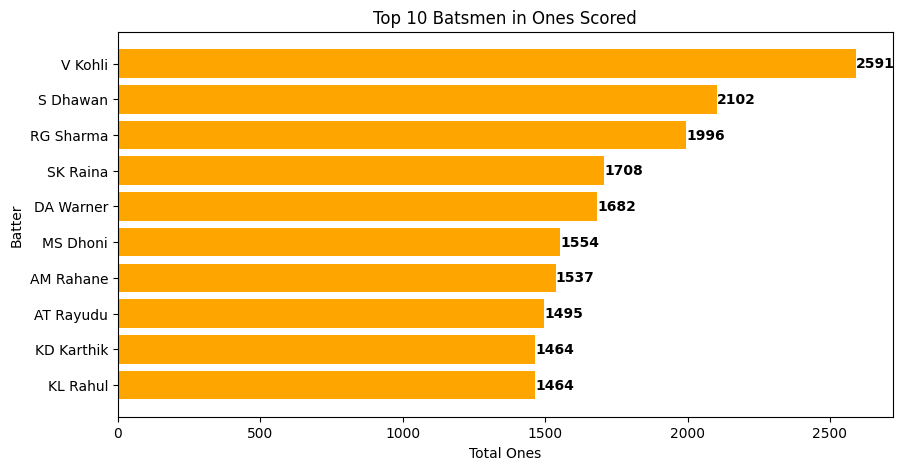

In [41]:
# Top 1’s scorer
plot_top_10('one', 'orange')

<h1><b>Seasonal Analysis:

<h3><b>Problems :

1. Calculate average runs per match per season
2. Identify targets of 200+ runs per season
3. Find the average score of each team per season
4. Analyze runs of Orange Cap Holders per season
5. Track wickets of Purple Cap Holders per season
6. Find top 10 bowlers per season

<h4><b>1. Calculate average runs per match per season

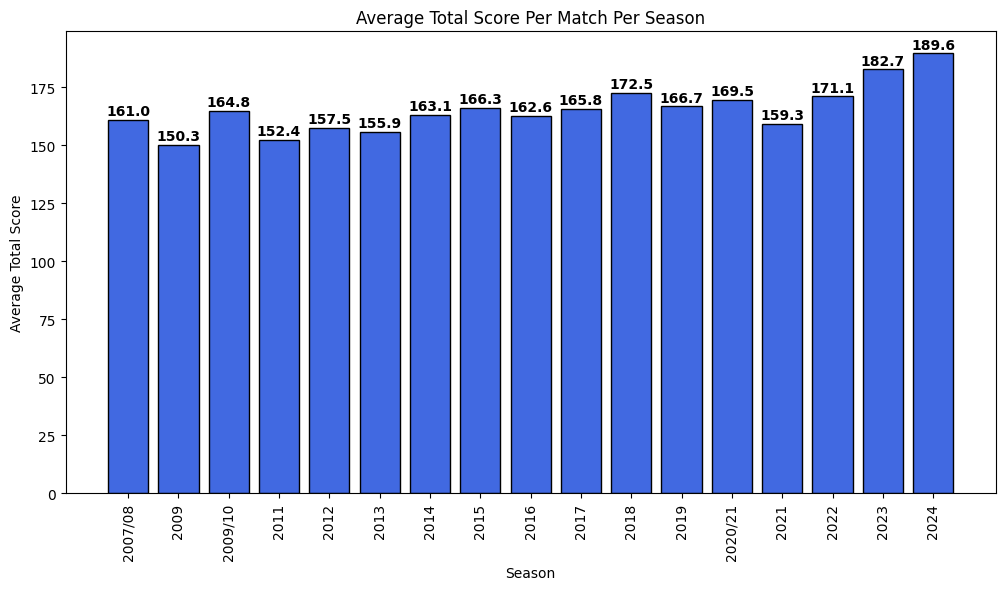

In [68]:
merged_df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Filter only 1st innings (as full team scores)
first_innings = merged_df[merged_df['inning'] == 1]

# Calculate total runs per season
season_total_runs = first_innings.groupby('season')['total_runs'].sum()

# Count number of matches per season
season_matches = matches.groupby('season').size()

# Calculate average total score per match
average_score_per_season = season_total_runs / season_matches

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(average_score_per_season.index, average_score_per_season, color='royalblue', edgecolor='black')

# Add text on bars
for i, val in enumerate(average_score_per_season):
    plt.text(i, val + 2, f"{val:.1f}", ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Season")
plt.ylabel("Average Total Score")
plt.title("Average Total Score Per Match Per Season")
plt.xticks(rotation=90)

plt.show()

<h4><b>2. Identify targets of 200+ runs per season

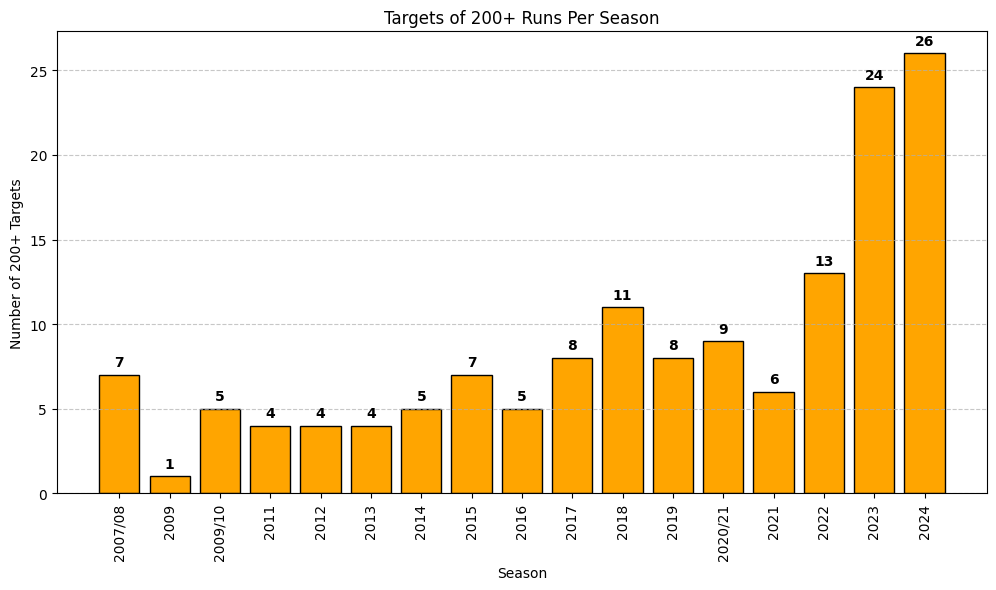

In [43]:
merged_df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')
first_innings_runs = merged_df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

first_innings_runs = first_innings_runs[first_innings_runs['inning'] == 1]
first_innings_runs = first_innings_runs.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

high_targets = first_innings_runs[first_innings_runs['total_runs'] >= 200]
targets_200_per_season = high_targets.groupby('season').size()

plt.figure(figsize=(12, 6))
bars = plt.bar(targets_200_per_season.index, targets_200_per_season.values, color='orange', edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Season")
plt.ylabel("Number of 200+ Targets")
plt.title("Targets of 200+ Runs Per Season")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4><b>3. Find the average score of each team per season

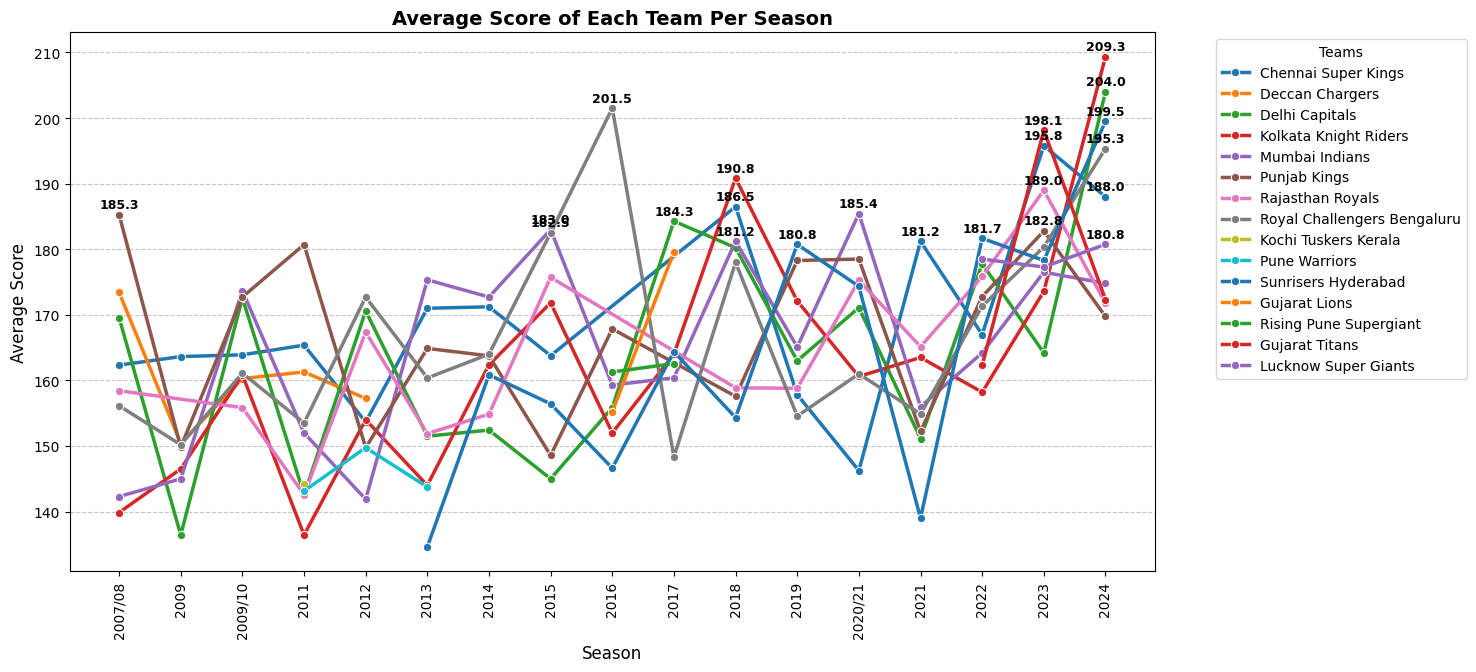

In [44]:
merged_df = deliveries.merge(match_df[['id', 'season', 'team1']], left_on='match_id', right_on='id')

first_innings_scores = merged_df[merged_df['inning'] == 1].groupby(['season', 'team1', 'match_id'])['total_runs'].sum().reset_index()
avg_score_per_team = first_innings_scores.groupby(['season', 'team1'])['total_runs'].mean().reset_index()
avg_score_per_team.rename(columns={'team1': 'Team', 'total_runs': 'Avg Score'}, inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_score_per_team, x='season', y='Avg Score', hue='Team', marker='o', linewidth=2.5, palette='tab10')

plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.title("Average Score of Each Team Per Season", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

for i, row in avg_score_per_team.iterrows():
    if row['Avg Score'] > avg_score_per_team['Avg Score'].quantile(0.85): 
        plt.text(row['season'], row['Avg Score'] + 1, f"{row['Avg Score']:.1f}", 
                 ha='center', fontsize=9, fontweight='bold', color='black')

plt.show()

<h4><b>4. Analyze runs of Orange Cap Holders per season

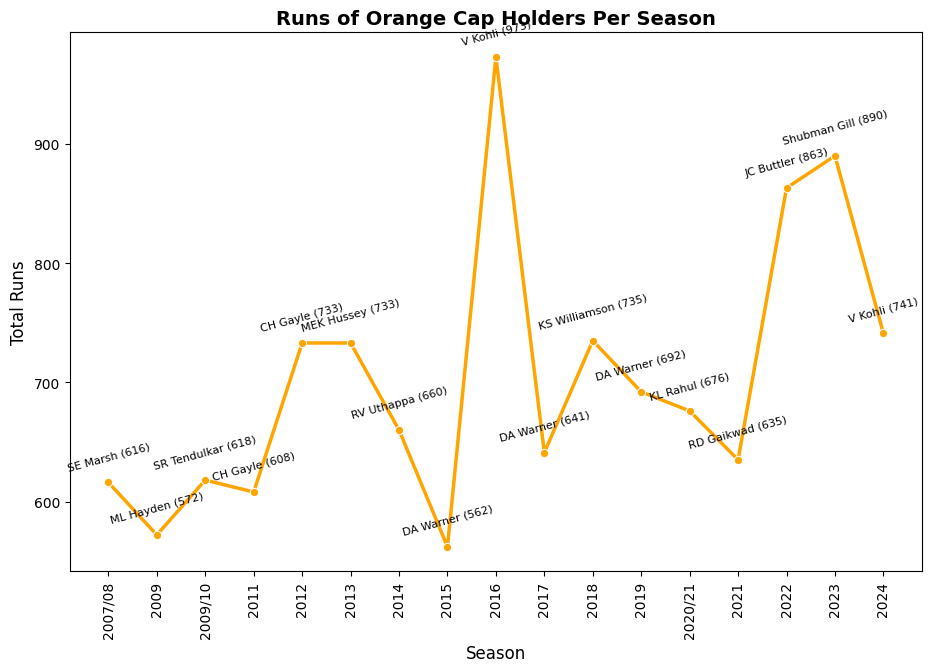

In [45]:

merged_df = deliveries.merge(match_df[['id', 'season']], left_on='match_id', right_on='id')
season_batsman_runs = merged_df.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

orange_cap_holders = season_batsman_runs.loc[season_batsman_runs.groupby('season')['batsman_runs'].idxmax()]

plt.figure(figsize=(11,7))
sns.lineplot(data=orange_cap_holders, x='season', y='batsman_runs', marker='o', color='orange', linewidth=2.5)

plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Runs", fontsize=12)
plt.title("Runs of Orange Cap Holders Per Season", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)

for i, row in orange_cap_holders.iterrows():
    plt.text(row['season'], row['batsman_runs'] + 10, 
             f"{row['batter']} ({row['batsman_runs']})", 
             ha='center', fontsize=8, color='black', rotation= 15 )

plt.show()

<h4><b>5. Track wickets of Purple Cap Holders per season

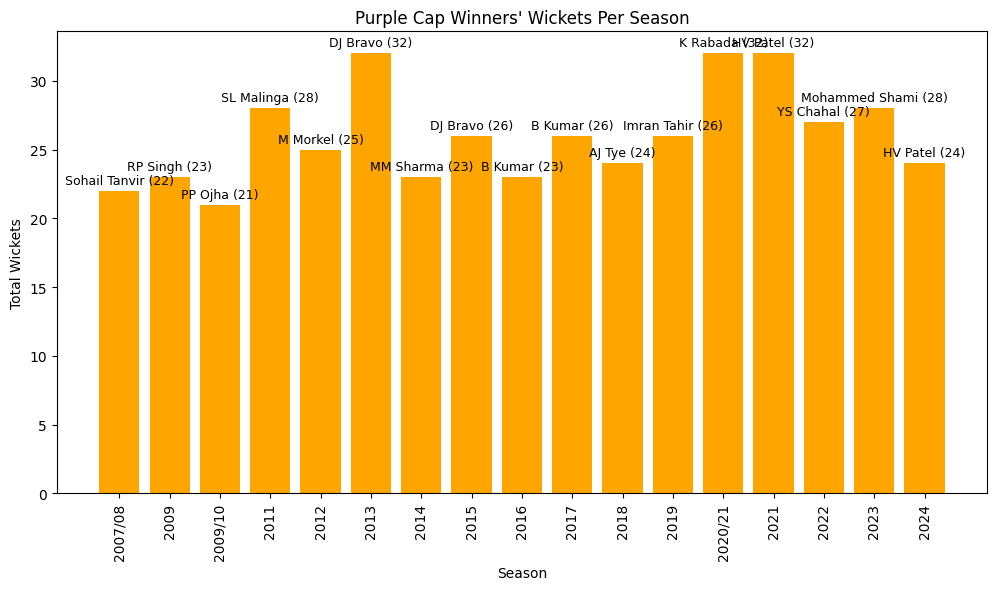

In [46]:
merged_df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

season_bowler_wickets = merged_df[merged_df['dismissal_kind'].isin(
    ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
)].groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()

purple_cap_holders = season_bowler_wickets.loc[season_bowler_wickets.groupby('season')['dismissal_kind'].idxmax()]

plt.figure(figsize=(12, 6))
plt.bar(purple_cap_holders['season'], purple_cap_holders['dismissal_kind'], color='orange')
plt.xlabel("Season")
plt.ylabel("Total Wickets")
plt.title("Purple Cap Winners' Wickets Per Season")
plt.xticks(rotation=90)

for i, txt in enumerate(purple_cap_holders['bowler']):
    annotation_text = f"{txt} ({purple_cap_holders['dismissal_kind'].iloc[i]})"
    
    plt.annotate(annotation_text, 
                 (purple_cap_holders['season'].iloc[i], purple_cap_holders['dismissal_kind'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=9, 
                 color='black')

plt.show()

<h4><b>6. Find top 10 bowlers per season

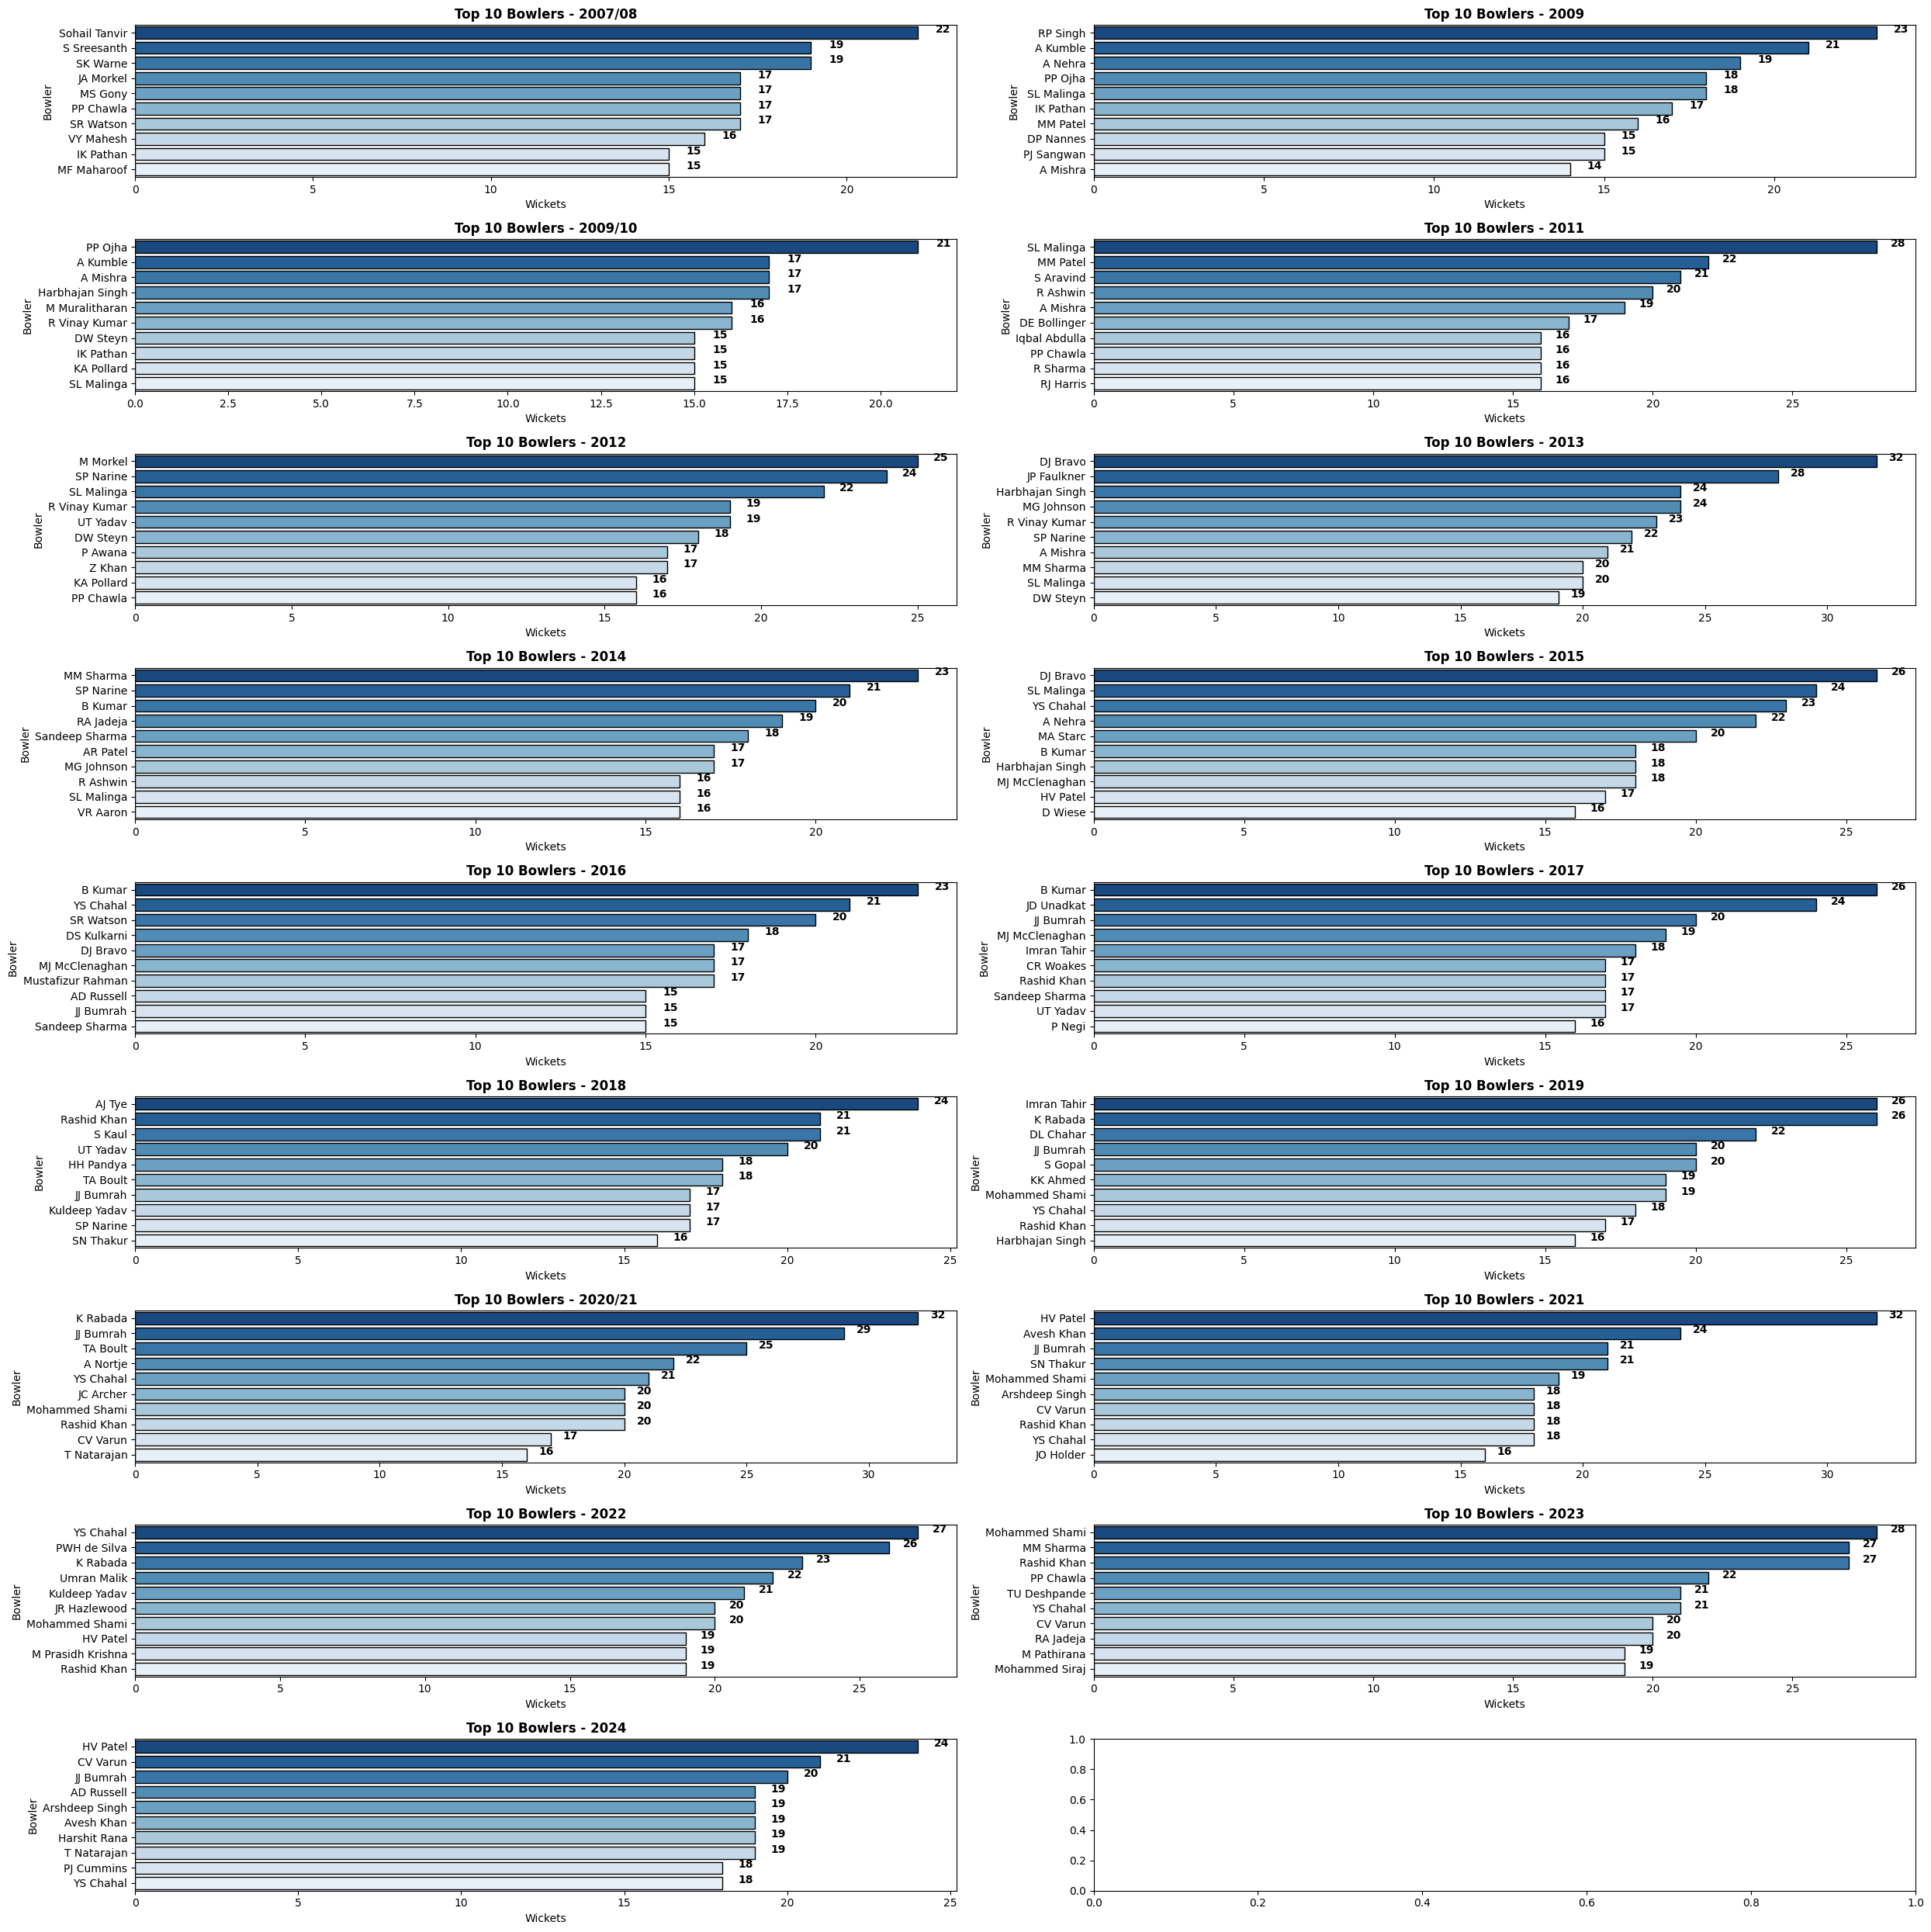

In [48]:
merged_df = deliveries.merge(match_df[['id', 'season']], left_on='match_id', right_on='id')
valid_dismissals = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]

season_bowler_wickets = merged_df[merged_df['dismissal_kind'].isin(valid_dismissals)]
season_bowler_wickets = season_bowler_wickets.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()
season_bowler_wickets.rename(columns={'dismissal_kind': 'wickets'}, inplace=True)

seasons = season_bowler_wickets['season'].unique()
fig, axes = plt.subplots(nrows=len(seasons)//2 + len(seasons) % 2, ncols=2, figsize=(25,25))
axes = axes.flatten()

for i, season in enumerate(seasons):
    top_10_bowlers = season_bowler_wickets[season_bowler_wickets['season'] == season].nlargest(10, 'wickets')
    
    sns.barplot(x='wickets', y='bowler', data=top_10_bowlers,hue='bowler', ax=axes[i], palette='Blues_r', edgecolor='black')
    axes[i].set_title(f"Top 10 Bowlers - {season}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Wickets")
    axes[i].set_ylabel("Bowler")
    
    for index, row in enumerate(top_10_bowlers.itertuples()):
        axes[i].text(row.wickets + 0.5, index, str(row.wickets), ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<h1><b>Winner Prediction Model

In [70]:
team_performance = match_df.groupby(['season', 'winner'])['id'].count().reset_index()
team_performance.rename(columns={'id': 'wins'}, inplace=True)

team_matches = match_df.melt(id_vars=['season', 'id'], value_vars=['team1', 'team2'], var_name='team_type', value_name='team')
team_matches = team_matches.groupby(['season', 'team'])['id'].count().reset_index()
team_matches.rename(columns={'id': 'total_matches'}, inplace=True)

team_stats = team_performance.merge(team_matches, left_on=['season', 'winner'], right_on=['season', 'team'], how='right')
team_stats['win_percentage'] = (team_stats['wins'] / team_stats['total_matches']) * 100
team_stats.fillna(0, inplace=True)

team_stats.head()

,season,winner,wins,team,total_matches,win_percentage
0,2007/08,Chennai Super Kings,9,Chennai Super Kings,16,56.250000
1,2007/08,Deccan Chargers,2,Deccan Chargers,14,14.285714
2,2007/08,Delhi Capitals,7,Delhi Capitals,14,50.000000
3,2007/08,Kolkata Knight Riders,6,Kolkata Knight Riders,13,46.153846
4,2007/08,Mumbai Indians,7,Mumbai Indians,14,50.000000


In [71]:
team_runs = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_runs = team_runs.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

team_avg_runs = team_runs.groupby(['season', 'batting_team'])['total_runs'].mean().reset_index()
team_avg_runs.rename(columns={'total_runs': 'avg_runs_per_match'}, inplace=True)

valid_dismissals = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
team_wickets = deliveries[deliveries['dismissal_kind'].isin(valid_dismissals)].groupby(['match_id', 'bowling_team']).size().reset_index(name='wickets')
team_wickets = team_wickets.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

team_avg_wickets = team_wickets.groupby(['season', 'bowling_team'])['wickets'].mean().reset_index()
team_avg_wickets.rename(columns={'wickets': 'avg_wickets_per_match'}, inplace=True)
team_features = team_stats.merge(team_avg_runs, left_on=['season', 'team'], right_on=['season', 'batting_team'], how='left')
team_features = team_features.merge(team_avg_wickets, left_on=['season', 'team'], right_on=['season', 'bowling_team'], how='left')

team_features.drop(columns=['batting_team', 'bowling_team'], inplace=True)
team_features.fillna(0, inplace=True)

team_features.head()

,season,winner,wins,team,total_matches,win_percentage,avg_runs_per_match,avg_wickets_per_match
0,2007/08,Chennai Super Kings,9,Chennai Super Kings,16,56.250000,157.500000,5.187500
1,2007/08,Deccan Chargers,2,Deccan Chargers,14,14.285714,159.214286,4.285714
2,2007/08,Delhi Capitals,7,Delhi Capitals,14,50.000000,151.285714,5.857143
3,2007/08,Kolkata Knight Riders,6,Kolkata Knight Riders,13,46.153846,149.384615,5.083333
4,2007/08,Mumbai Indians,7,Mumbai Indians,14,50.000000,148.571429,6.384615


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

team_features['is_winner'] = (team_features['team'] == team_features['winner']).astype(int)  # Binary target variable
X = team_features[['win_percentage', 'avg_runs_per_match', 'avg_wickets_per_match']]
y = team_features['is_winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)

model_accuracy

1.0